In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set_style('whitegrid') # setting the background style for seaborn plots to help with readability


In [2]:
# Importing the cleaned, daily aggregated crime_type offense count dataframe
daily_df = pd.read_csv('data/processed/daily_aggregated_df.csv')


In [3]:
#I want to add a new column to daily_df that contains the value 1
daily_df['helper_count'] = 1
daily_df.head()

,dispatch_date,violent_offense_count,felony_count,misdemeanor_count,year,year_group,dispatch_wday,dispatch_month,dispatch_quarter,tmax,tmin,helper_count
0,2006-01-01,73,91,167,2006,2006-2009,Sunday,January,1,45.0,35.0,1
1,2006-01-02,52,75,110,2006,2006-2009,Monday,January,1,46.0,35.0,1
2,2006-01-03,62,93,88,2006,2006-2009,Tuesday,January,1,46.0,39.0,1
3,2006-01-04,53,71,111,2006,2006-2009,Wednesday,January,1,46.0,37.0,1
4,2006-01-05,43,54,99,2006,2006-2009,Thursday,January,1,51.0,37.0,1


In [4]:
#I want to add up the rows of daily_df per year per dispatch_quarter
yearly_quarterly_df = pd.DataFrame(daily_df.groupby(['year','dispatch_quarter']).sum())
# taking a look at the new df for counts per year per quarter
yearly_quarterly_df.head()

/var/folders/gx/htb5vl916_j820n434lbd_2dzp39cq/T/ipykernel_40077/3951611532.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_quarterly_df = pd.DataFrame(daily_df.groupby(['year','dispatch_quarter']).sum())


violent_offense_count  felony_count  misdemeanor_count  \
year dispatch_quarter                                                           
2006 1                                  4802          6387              10304   
     2                                  5701          7697              10934   
     3                                  5778          8161              12023   
     4                                  5784          7997              11900   
2007 1                                  4646          6641               9740   

                         tmax    tmin  helper_count  
year dispatch_quarter                                
2006 1                 4628.0  3221.0            90  
     2                 7090.0  5224.0            91  
     3                 7808.0  6321.0            92  
     4                 5302.0  4013.0            92  
2007 1                 3956.0  2675.0            89

# Quaterly Heatmap

In [5]:
#now I want to add up the rows of daily_df per quarter
#Looking at quarters seem to be an appropriate approach to looking at times of the year
#(AKA seasons/business quarters) in which certain average temperatures are consistently lower/higher
#Inherently, quarters 2 and 3 can be seen as more "hotter" quarters, whereas quarters 1 and 4 seen as "colder",
quarterly_df = pd.DataFrame(daily_df.groupby(['dispatch_quarter']).sum())
# taking a look at the new df for counts per quarter
quarterly_df.head()

/var/folders/gx/htb5vl916_j820n434lbd_2dzp39cq/T/ipykernel_40077/4138313508.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quarterly_df = pd.DataFrame(daily_df.groupby(['dispatch_quarter']).sum())


,violent_offense_count,felony_count,misdemeanor_count,year,tmax,tmin,helper_count
dispatch_quarter,,,,,,,
1,62575,77761,130492,2962325,68309.0,46407.0,1471
2,70983,87350,145280,2909647,108754.0,82678.0,1445
3,77755,97087,157664,3113562,132210.0,106492.0,1546
4,70492,88621,143783,2992421,84790.0,63553.0,1486


In [6]:
#I want to create a new column in quarterly_df named tmax_avg that contains the average of tmax
quarterly_df['tmax_avg'] = quarterly_df['tmax']/quarterly_df['helper_count']
#I want to create a new column in quarterly_df named tmin_avg that contains the average of tmin
quarterly_df['tmin_avg'] = quarterly_df['tmin']/quarterly_df['helper_count']
#I want to create a new column in quarterly_df named violent_offense_avg that contains the average of violent_offense
quarterly_df['violent_offense_avg'] = quarterly_df['violent_offense_count']/quarterly_df['helper_count']
#I want to create a new column in quarterly_df named felony_count_avg that contains the average of felony_count
quarterly_df['felony_count_avg'] = quarterly_df['felony_count']/quarterly_df['helper_count']
#I want to create a new column in quarterly_df named misdemeanor_count_avg that contains the average of misdemeanor_count
quarterly_df['misdemeanor_count_avg'] = quarterly_df['misdemeanor_count']/quarterly_df['helper_count']

# looking at the new df for counts per quarter for the heatmap
quarterly_df.head()

,violent_offense_count,felony_count,misdemeanor_count,year,tmax,tmin,helper_count,tmax_avg,tmin_avg,violent_offense_avg,felony_count_avg,misdemeanor_count_avg
dispatch_quarter,,,,,,,,,,,,
1,62575,77761,130492,2962325,68309.0,46407.0,1471,46.437118,31.547927,42.539089,52.862678,88.709721
2,70983,87350,145280,2909647,108754.0,82678.0,1445,75.262284,57.216609,49.123183,60.449827,100.539792
3,77755,97087,157664,3113562,132210.0,106492.0,1546,85.517464,68.882277,50.294308,62.798836,101.981889
4,70492,88621,143783,2992421,84790.0,63553.0,1486,57.059219,42.767833,47.437416,59.637281,96.758412


In [7]:
# creating a new df that contains only the columns that I want to use for the heatmap
quarterly_heatmap_df = quarterly_df[['tmax_avg','tmin_avg','violent_offense_avg','felony_count_avg','misdemeanor_count_avg']]

# Visualizing heat and aggression per quarter using a heatmap
quarterly_heatmap_df.style.background_gradient()\
        .set_properties(**{'font-size': '20px'})

,tmax_avg,tmin_avg,violent_offense_avg,felony_count_avg,misdemeanor_count_avg
dispatch_quarter,,,,,
1,46.437118,31.547927,42.539089,52.862678,88.709721
2,75.262284,57.216609,49.123183,60.449827,100.539792
3,85.517464,68.882277,50.294308,62.798836,101.981889
4,57.059219,42.767833,47.437416,59.637281,96.758412


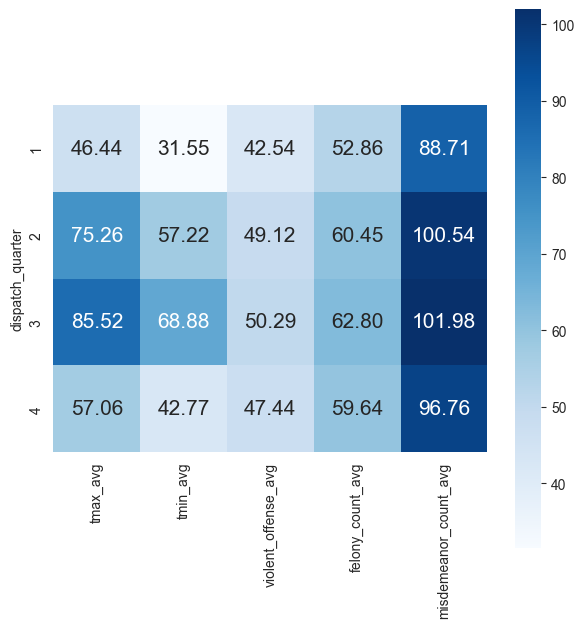

In [8]:
# Another similar visualization of heat and aggression per quarter using a seaborn heatmap
fig, ax = plt.subplots(figsize=(7, 7))

sns.heatmap(quarterly_heatmap_df, square=True, fmt='.2f',
           cmap='Blues',
           annot=True, annot_kws={'size': 15},)

plt.savefig('presentation/figures/heatmap.png')
plt.show()

# Weekly Heatmap

In [9]:
##I want to add up the rows of daily_df per year per day of the week
yearly_weekly_df = pd.DataFrame(daily_df.groupby(['year','dispatch_wday']).sum())
yearly_weekly_df.head()

/var/folders/gx/htb5vl916_j820n434lbd_2dzp39cq/T/ipykernel_40077/3520894808.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_weekly_df = pd.DataFrame(daily_df.groupby(['year','dispatch_wday']).sum())


violent_offense_count  felony_count  misdemeanor_count  \
year dispatch_wday                                                           
2006 Friday                          3142          4250               6162   
     Monday                          3158          4450               6687   
     Saturday                        3227          4361               6904   
     Sunday                          3457          4663               7187   
     Thursday                        2940          4012               5918   

                    dispatch_quarter    tmax    tmin  helper_count  
year dispatch_wday                                                  
2006 Friday                      130  3569.0  2674.0            52  
     Monday                      130  3542.0  2680.0            52  
     Saturday                    132  3519.0  2556.0            52  
     Sunday                      134  3506.0  2647.0            53  
     Thursday                    130  3645.0  2757.0            52

In [10]:
##I want to add up the rows of yearly_weekly_df per day of the week
weekly_df = pd.DataFrame(yearly_weekly_df.groupby(['dispatch_wday']).sum())
weekly_df.head()

,violent_offense_count,felony_count,misdemeanor_count,dispatch_quarter,tmax,tmin,helper_count
dispatch_wday,,,,,,,
Friday,39997,49793,82317,2141,56627.0,42935.0,854
Monday,40235,51242,85800,2125,55813.0,42282.0,844
Saturday,40814,49894,85397,2135,56095.0,42216.0,851
Sunday,41123,49726,86376,2125,55500.0,42062.0,847
Thursday,38980,48627,77639,2140,56777.0,43294.0,851


In [11]:
#I want to create a new column in weekly_df named tmax_avg that contains the average of tmax
weekly_df['tmax_avg'] = weekly_df['tmax']/weekly_df['helper_count']
#I want to create a new column in weekly_df named tmin_avg that contains the average of tmin
weekly_df['tmin_avg'] = weekly_df['tmin']/weekly_df['helper_count']
#I want to create a new column in weekly_df named violent_offense_avg that contains the average of violent_offense
weekly_df['violent_offense_avg'] = weekly_df['violent_offense_count']/weekly_df['helper_count']
#I want to create a new column in weekly_df named felony_count_avg that contains the average of felony_count
weekly_df['felony_count_avg'] = weekly_df['felony_count']/weekly_df['helper_count']
#I want to create a new column in weekly_df named misdemeanor_count_avg that contains the average of misdemeanor_count
weekly_df['misdemeanor_count_avg'] = weekly_df['misdemeanor_count']/weekly_df['helper_count']

# creating a new df that contains only the columns that I want to use for the heatmap
weekly_heatmap_df = weekly_df[['violent_offense_avg','felony_count_avg','misdemeanor_count_avg']]

# transposing the weekly_heatmap_df for easier visualization
weekly_heatmap_df = weekly_heatmap_df.transpose()

In [12]:
# Visualizing heat and aggression per day of week using a heatmap
weekly_heatmap_df.style.background_gradient(axis=1)\
        .set_properties(**{'font-size': '20px'})

dispatch_wday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
violent_offense_avg,46.834895,47.671801,47.960047,48.551358,45.804935,47.787059,47.047004
felony_count_avg,58.305621,60.713270,58.629847,58.708383,57.141011,60.258824,59.126910
misdemeanor_count_avg,96.389930,101.658768,100.349001,101.978749,91.232667,94.745882,93.015276


In [13]:
# re-looking at the initial daily_df with all distinct data points
daily_df.info()
daily_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5948 entries, 0 to 5947
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dispatch_date          5948 non-null   object 
 1   violent_offense_count  5948 non-null   int64  
 2   felony_count           5948 non-null   int64  
 3   misdemeanor_count      5948 non-null   int64  
 4   year                   5948 non-null   int64  
 5   year_group             5948 non-null   object 
 6   dispatch_wday          5948 non-null   object 
 7   dispatch_month         5948 non-null   object 
 8   dispatch_quarter       5948 non-null   int64  
 9   tmax                   5948 non-null   float64
 10  tmin                   5948 non-null   float64
 11  helper_count           5948 non-null   int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 557.8+ KB


,dispatch_date,violent_offense_count,felony_count,misdemeanor_count,year,year_group,dispatch_wday,dispatch_month,dispatch_quarter,tmax,tmin,helper_count
0,2006-01-01,73,91,167,2006,2006-2009,Sunday,January,1,45.0,35.0,1
1,2006-01-02,52,75,110,2006,2006-2009,Monday,January,1,46.0,35.0,1
2,2006-01-03,62,93,88,2006,2006-2009,Tuesday,January,1,46.0,39.0,1
3,2006-01-04,53,71,111,2006,2006-2009,Wednesday,January,1,46.0,37.0,1
4,2006-01-05,43,54,99,2006,2006-2009,Thursday,January,1,51.0,37.0,1


# Relationship between Outcomes and Temperatures

In [14]:
#make a copy df for more EDA visualizations because I don't want to mess up the original df by adding additional columns for visualization purposes
daily_df_copy = daily_df.copy()

#Renaming existing columns and adding additional columns to the daily_df_copy for visualization purposes
daily_df_copy['Log(Violent Offense Count)'] = np.log(daily_df['violent_offense_count']) # new column for natural log transformation for violent offense counts
daily_df_copy['Log(Felony Count)'] = np.log(daily_df['felony_count']) # new column for natural log transformation for felony counts
daily_df_copy['Log(Misdemeanor Count)'] = np.log(daily_df['misdemeanor_count']) # new column for natural log transformation for misdemeanor counts
daily_df_copy['Square Root(Violent Offense Count)'] = np.sqrt(daily_df['violent_offense_count']) # new column for square root transformation for violent offense counts
daily_df_copy['Square Root(Felony Count)'] = np.sqrt(daily_df['felony_count']) # new column for square root transformation for felony counts
daily_df_copy['Square Root(Misdemeanor Count)'] = np.sqrt(daily_df['misdemeanor_count']) # new column for square root transformation for misdemeanor counts
daily_df_copy['Quarter'] = daily_df['dispatch_quarter'] # Renaming column for easier legibility as a Legend
daily_df_copy['Daily Maximum Temperature (F)'] = daily_df['tmax'] # Renaming column for easier legibility as an Axis Label


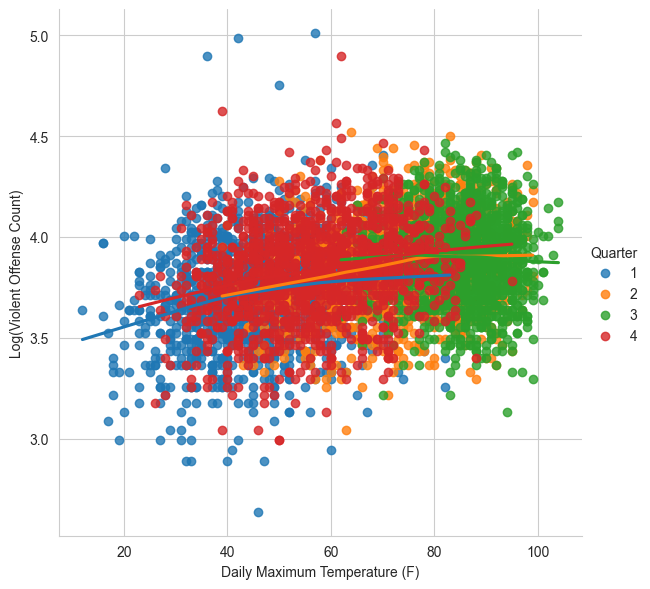

In [15]:
#Visualize the relationship between daily maximum temperature and violent offense count using a seaborn lowess plot
sns.lmplot(data=daily_df_copy, x='Daily Maximum Temperature (F)', y='Log(Violent Offense Count)', hue='Quarter', lowess = True, height=6, aspect=1)

plt.show()

## Log(Violent Offense Count) vs. Daily Maximum Temperature (F)

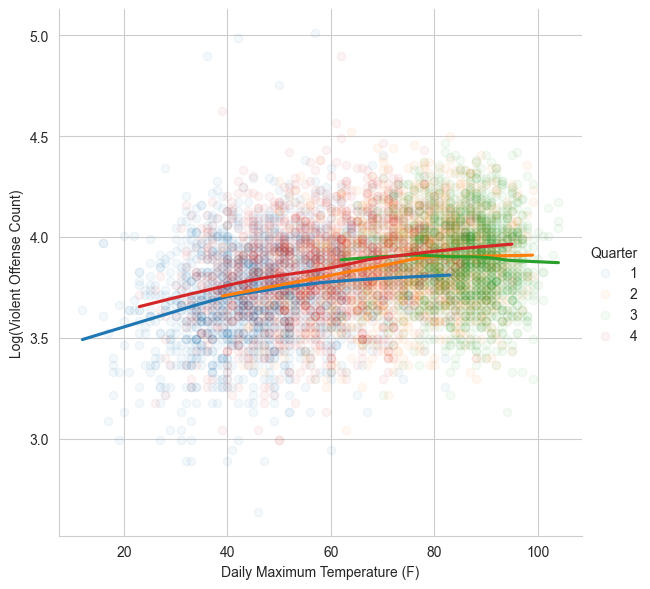

In [16]:
# Re-visualize the relationship between daily maximum temperature and violent offense count with a natural log transformation using a seaborn lowess plot
# This time, use alpha values to make lines more visible/interpretable
sns.lmplot(data=daily_df_copy, x='Daily Maximum Temperature (F)', y='Log(Violent Offense Count)', hue='Quarter', lowess = True ,height=6, aspect=1, scatter_kws={'alpha':0.05})

plt.savefig("presentation/figures/lowess_violent_offense_count.png")
plt.show()

## Sqrt(Violent Offense Count) vs. Daily Maximum Temperature (F)

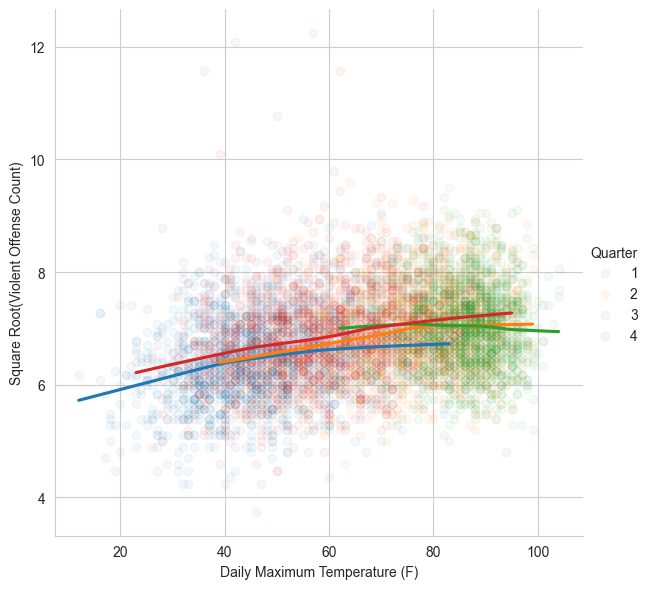

In [17]:
# Visualize the relationship between daily maximum temperature and violent offense count with a square root transformation using a seaborn lowess plot
sns.lmplot(data=daily_df_copy, x='Daily Maximum Temperature (F)', y='Square Root(Violent Offense Count)', hue='Quarter', lowess = True ,height=6, aspect=1, scatter_kws={'alpha':0.05})

plt.show()

## Log(Felony Count) vs. Daily Maximum Temperature (F)

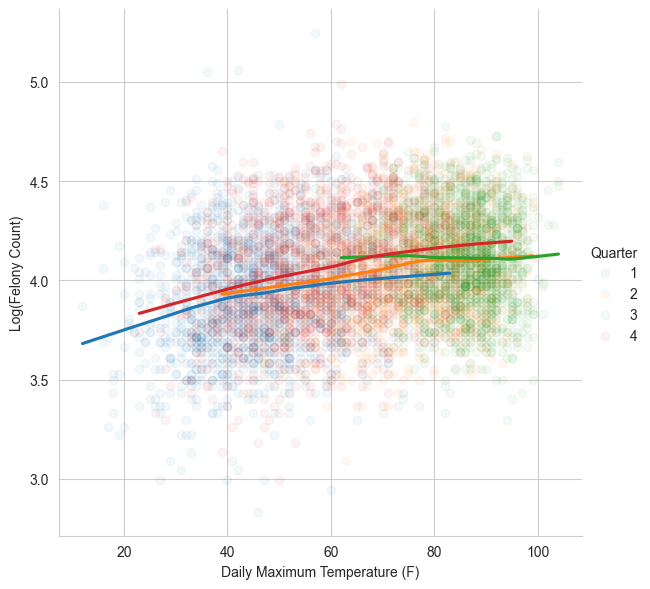

In [18]:
# Visualize the relationship between daily maximum temperature and felony count with a natural log transformation using a seaborn lowess plot
sns.lmplot(data=daily_df_copy, x='Daily Maximum Temperature (F)', y='Log(Felony Count)', hue='Quarter', lowess = True ,height=6, aspect=1, scatter_kws={'alpha':0.05})

plt.savefig("presentation/figures/lowess_felony_count.png")
plt.show()

## Sqrt(Felony Count) vs. Daily Maximum Temperature (F)


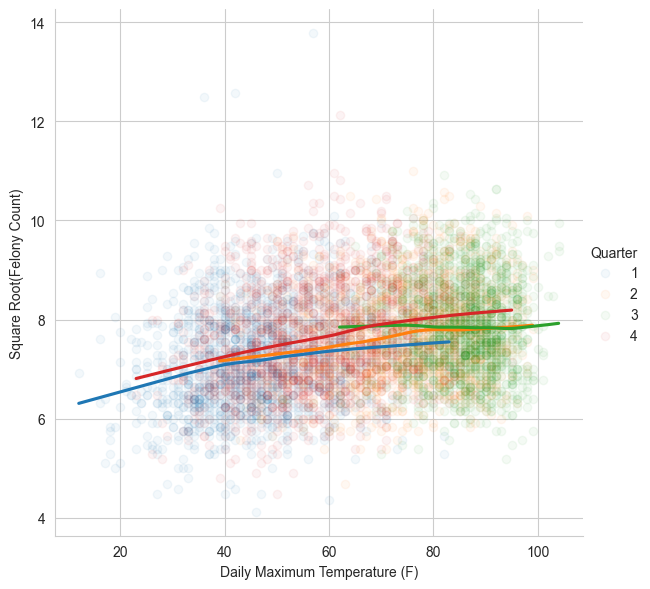

In [19]:
# Visualize the relationship between daily maximum temperature and felony count with a square root transformation using a seaborn lowess plot
sns.lmplot(data=daily_df_copy, x='Daily Maximum Temperature (F)', y='Square Root(Felony Count)', hue='Quarter', lowess = True, height=6, aspect=1, scatter_kws={'alpha':0.05})

plt.show()

## Log(Misdemeanor Count) vs. Daily Maximum Temperature (F)

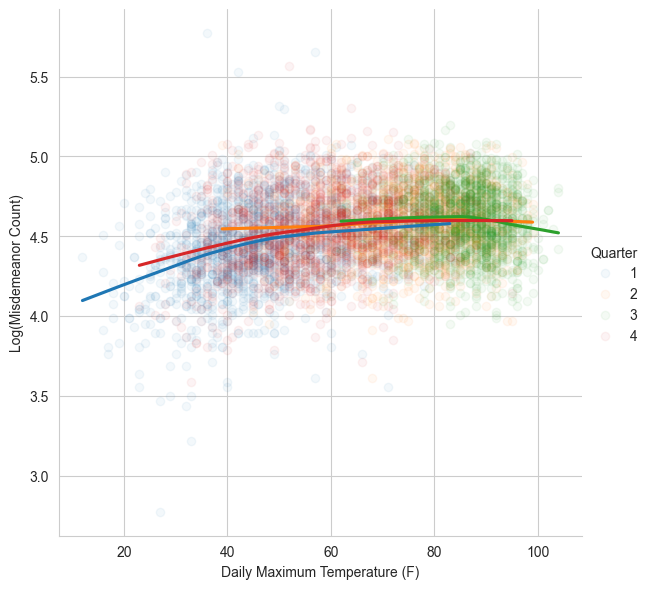

In [20]:
# Visualize the relationship between daily maximum temperature and misdemeanor count with a natural log transformation using a seaborn lowess plot
sns.lmplot(data=daily_df_copy, x='Daily Maximum Temperature (F)', y='Log(Misdemeanor Count)', hue='Quarter', lowess = True, height=6, aspect=1, scatter_kws={'alpha':0.05})

plt.savefig("presentation/figures/lowess_misdemenor_count.png")

plt.show()

## Sqrt(Misdemeanor Count) vs. Daily Maximum Temperature (F)


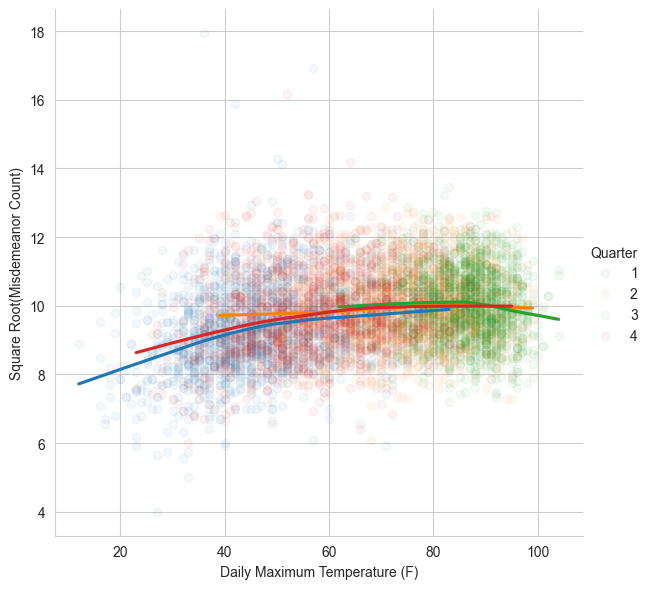

In [21]:
# Visualize the relationship between daily maximum temperature and misdemeanor count with a square root transformation using a seaborn lowess plot
sns.lmplot(data=daily_df_copy, x='Daily Maximum Temperature (F)', y='Square Root(Misdemeanor Count)', hue='Quarter', lowess = True, height=6, aspect=1, scatter_kws={'alpha':0.05})

plt.show()